In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [ ]:
data=pd.read_csv('measurements.csv')

In [ ]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [ ]:
data.describe()

,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,11.358247,0.077320,0.123711,0.082474
std,13.598524,6.991542,0.267443,0.329677,0.275441
min,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,32.750000,7.000000,0.000000,0.000000,0.000000
50%,40.500000,10.000000,0.000000,0.000000,0.000000
75%,50.000000,16.000000,0.000000,0.000000,0.000000
max,90.000000,31.000000,1.000000,1.000000,1.000000


In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [ ]:

data.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [ ]:
# Clean the data 

In [ ]:
data['specials']=data['specials'].fillna('No Special')

In [ ]:
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,No Special,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,No Special,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,No Special,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,No Special,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,No Special,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,No Special,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,No Special,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [ ]:
data['refill liters']=data['refill liters'].fillna('0')

In [ ]:
data['refill gas']=data['refill gas'].fillna('No refill')

In [ ]:
data.isna().sum()

distance          0
consume           0
speed             0
temp_inside      12
temp_outside      0
specials          0
gas_type          0
AC                0
rain              0
sun               0
refill liters     0
refill gas        0
dtype: int64

In [ ]:
data=data.dropna(subset=['temp_inside'])

In [ ]:
data['specials'].value_counts()

No Special            285
rain                   31
sun                    26
AC rain                 9
ac                      8
AC                      6
snow                    3
sun ac                  3
AC snow                 1
half rain half sun      1
AC sun                  1
AC Sun                  1
ac rain                 1
Name: specials, dtype: int64

In [ ]:
# Correct all the misstypes so that the data is in the same format. 

In [ ]:
data['specials']=data['specials'].replace('ac','AC').replace('sun ac','AC sun').replace('AC Sun','AC sun').replace('ac rain','AC rain')

<ipython-input-25-4a71c88dd9ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['specials']=data['specials'].replace('ac','AC').replace('sun ac','AC sun').replace('AC Sun','AC sun').replace('ac rain','AC rain')


In [ ]:
data.drop('specials', axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
data['specials'].value_counts()

No Special            285
rain                   31
sun                    26
AC                     14
AC rain                10
AC sun                  5
snow                    3
AC snow                 1
half rain half sun      1
Name: specials, dtype: int64

In [ ]:
data['distance']=data['distance'].str.replace(',','.')

<ipython-input-27-244dea126264>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['distance']=data['distance'].str.replace(',','.')


In [ ]:
data['consume']=data['consume'].str.replace(',','.')

<ipython-input-28-4a5520a493e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['consume']=data['consume'].str.replace(',','.')


In [ ]:
data['temp_inside']=data['temp_inside'].str.replace(',','.')

<ipython-input-29-2d1942140025>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['temp_inside']=data['temp_inside'].str.replace(',','.')


In [ ]:
data['refill liters']=data['refill liters'].str.replace(',','.')

<ipython-input-30-edffbf868913>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['refill liters']=data['refill liters'].str.replace(',','.')


In [ ]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,21.5,12,No Special,E10,0,0,0,45,E10
1,12,4.2,30,21.5,13,No Special,E10,0,0,0,0,No refill
2,11.2,5.5,38,21.5,15,No Special,E10,0,0,0,0,No refill
3,12.9,3.9,36,21.5,14,No Special,E10,0,0,0,0,No refill
4,18.5,4.5,46,21.5,15,No Special,E10,0,0,0,0,No refill


In [ ]:
data['distance']=pd.to_numeric(data['distance'], downcast='float')
data['consume']=pd.to_numeric(data['consume'], downcast='float')
data['temp_inside']=pd.to_numeric(data['temp_inside'], downcast='float')
data['refill liters']=pd.to_numeric(data['refill liters'], downcast='float')

<ipython-input-32-b7b98bdff635>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['distance']=pd.to_numeric(data['distance'], downcast='float')
<ipython-input-32-b7b98bdff635>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['consume']=pd.to_numeric(data['consume'], downcast='float')
<ipython-input-32-b7b98bdff635>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       376 non-null    float32
 1   consume        376 non-null    float32
 2   speed          376 non-null    int64  
 3   temp_inside    376 non-null    float32
 4   temp_outside   376 non-null    int64  
 5   specials       376 non-null    object 
 6   gas_type       376 non-null    object 
 7   AC             376 non-null    int64  
 8   rain           376 non-null    int64  
 9   sun            376 non-null    int64  
 10  refill liters  376 non-null    float32
 11  refill gas     376 non-null    object 
dtypes: float32(4), int64(5), object(3)
memory usage: 32.3+ KB


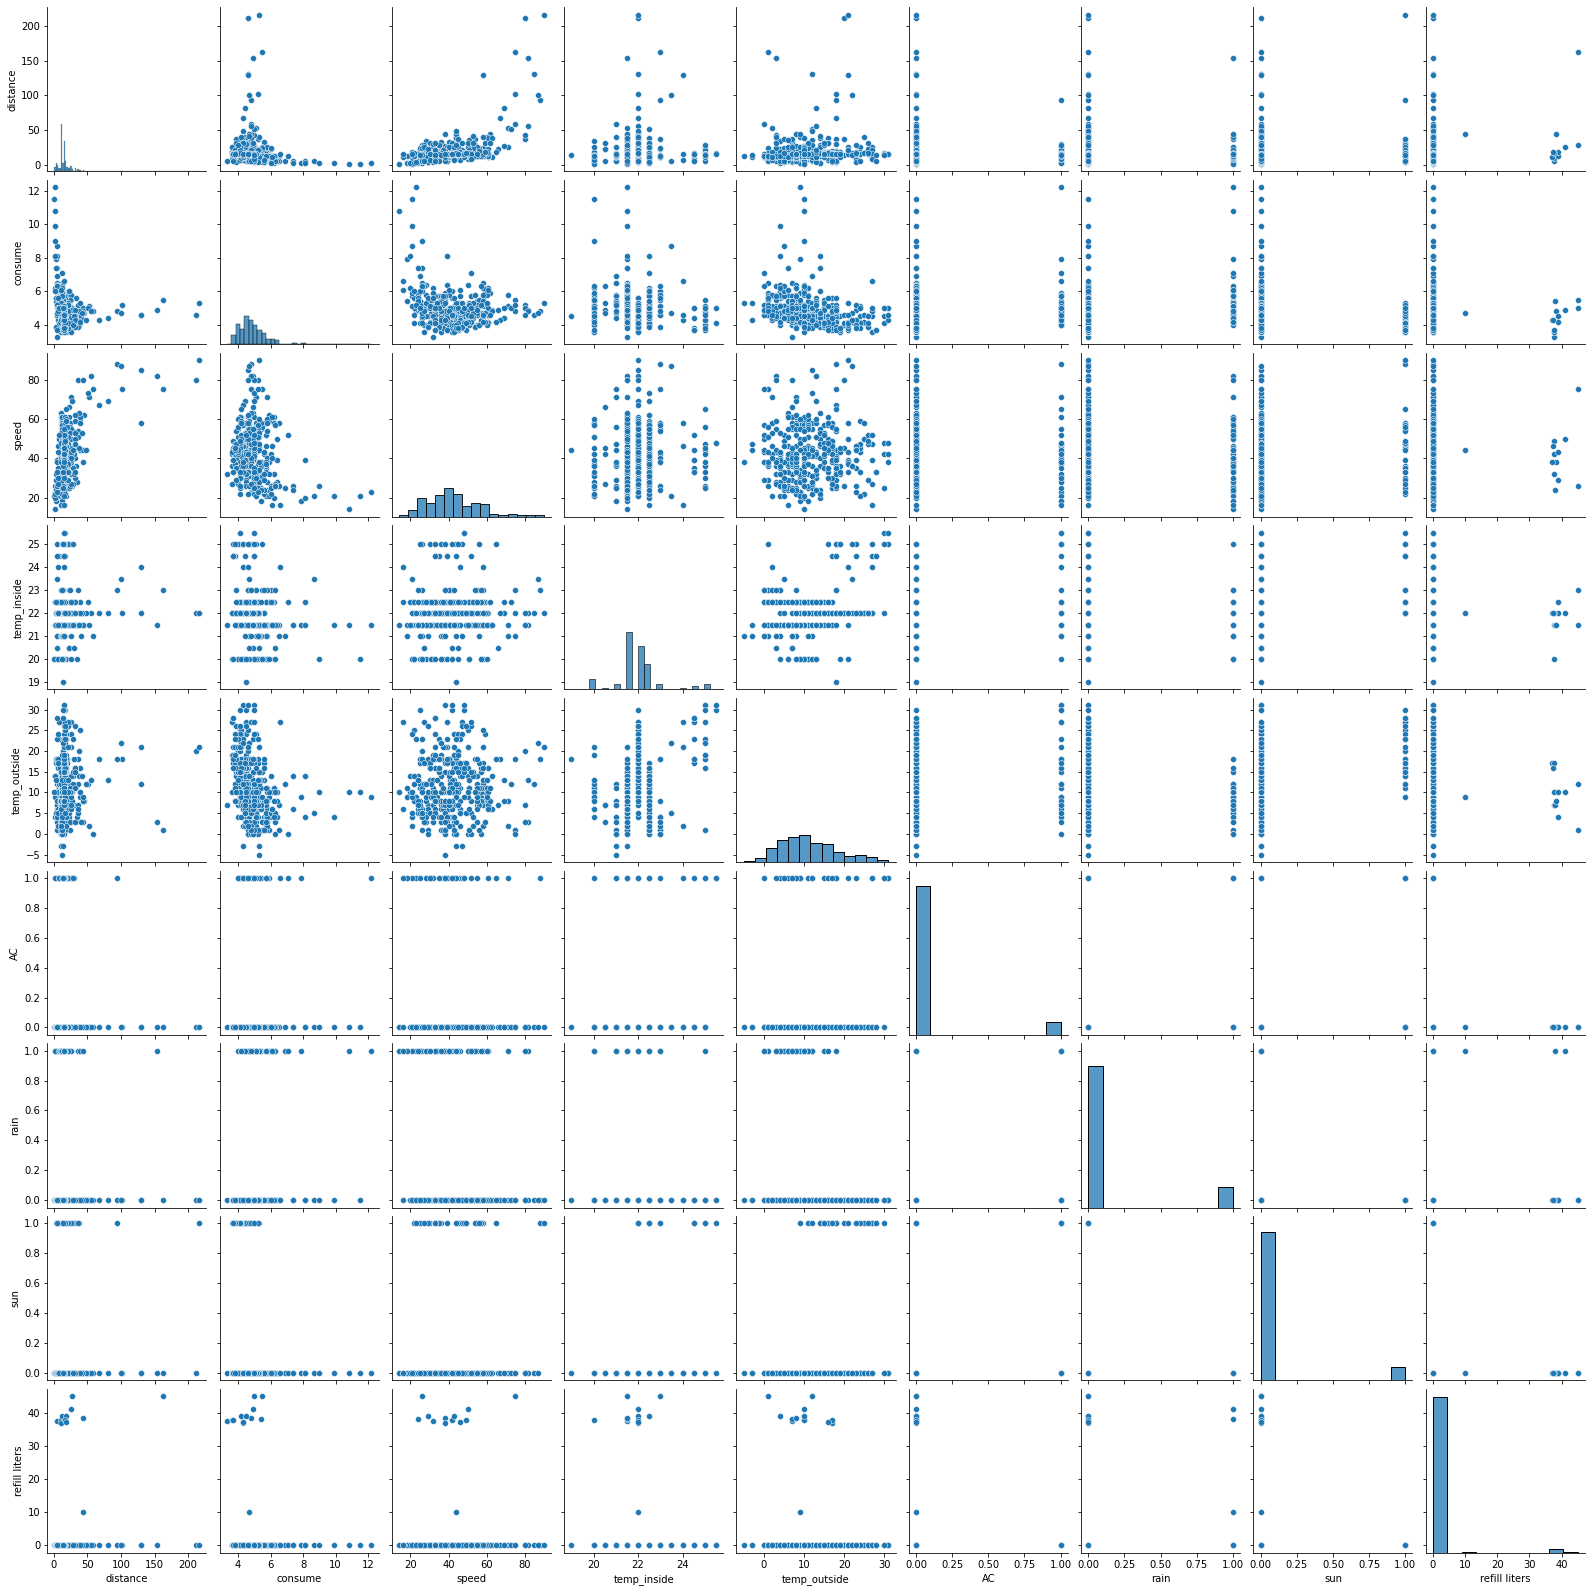

In [ ]:

#Correlations
g=sns.pairplot(data)

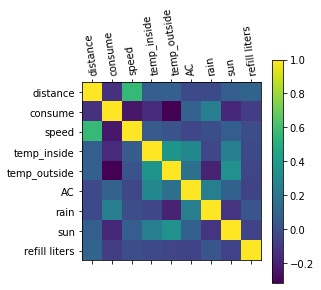

In [ ]:
plt.matshow(data.corr())
plt.xticks(range(9),data.corr().columns, rotation=98)
plt.yticks(range(9),data.corr().columns)
plt.colorbar()
plt.show()

In [ ]:

corr_df = data.corr()
corr_df

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
distance,1.000000,-0.131379,0.565505,0.075305,0.086774,-0.027670,-0.022129,0.078627,0.106120
consume,-0.131379,1.000000,-0.234537,-0.161991,-0.318758,0.093892,0.247699,-0.169173,-0.077056
speed,0.565505,-0.234537,1.000000,0.059725,0.019327,-0.036351,-0.002936,0.077181,-0.007904
temp_inside,0.075305,-0.161991,0.059725,1.000000,0.361308,0.297775,-0.037356,0.246120,-0.021359
temp_outside,0.086774,-0.318758,0.019327,0.361308,1.000000,0.169374,-0.185731,0.349988,-0.041360
AC,-0.027670,0.093892,-0.036351,0.297775,0.169374,1.000000,0.244848,0.090164,-0.054350
rain,-0.022129,0.247699,-0.002936,-0.037356,-0.185731,0.244848,1.000000,-0.113298,0.033183
sun,0.078627,-0.169173,0.077181,0.246120,0.349988,0.090164,-0.113298,1.000000,-0.055329
refill liters,0.106120,-0.077056,-0.007904,-0.021359,-0.041360,-0.054350,0.033183,-0.055329,1.000000


In [ ]:
data.describe()


,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.00000,376.000000,376.000000
mean,19.797340,4.925266,41.957447,21.929522,11.340426,0.079787,0.12500,0.082447,1.283245
std,22.988878,1.040705,13.714354,1.010455,7.066999,0.271325,0.33116,0.275411,6.961591
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.00000,0.000000,0.000000
25%,11.800000,4.300000,32.000000,21.500000,6.000000,0.000000,0.00000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.00000,0.000000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.00000,0.000000,0.000000
max,216.100006,12.200000,90.000000,25.500000,31.000000,1.000000,1.00000,1.000000,45.000000


In [ ]:
data[data['gas_type']=='E10']

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,litros_consumidos
0,28.000000,5.0,26,21.5,12,E10,0,0,0,1.4000
1,12.000000,4.2,30,21.5,13,E10,0,0,0,0.5040
2,11.200000,5.5,38,21.5,15,E10,0,0,0,0.6160
3,12.900000,3.9,36,21.5,14,E10,0,0,0,0.5031
4,18.500000,4.5,46,21.5,15,E10,0,0,0,0.8325
...,...,...,...,...,...,...,...,...,...,...
344,16.100000,5.1,30,25.0,16,E10,1,1,0,0.8211
345,16.000000,4.0,42,22.0,15,E10,0,0,0,0.6400
346,15.400000,4.8,40,22.0,18,E10,0,0,0,0.7392
347,17.200001,3.9,35,22.0,16,E10,0,0,0,0.6708


In [ ]:
sample_h1=data[data['rain']==1]['consume']

In [ ]:
st.ttest_1samp(sample_h1, 4.91, alternative= 'greater')

Ttest_1sampResult(statistic=3.196265020051977, pvalue=0.001258774528975221)

In [ ]:
data['litros_consumidos'] = (data.consume*data.distance)/100

<ipython-input-71-1bd4cd35f90b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['litros_consumidos'] = (data.consume*data.distance)/100


In [ ]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,litros_consumidos
0,28.0,5.0,26,21.5,12,E10,0,0,0,1.4000
1,12.0,4.2,30,21.5,13,E10,0,0,0,0.5040
2,11.2,5.5,38,21.5,15,E10,0,0,0,0.6160
3,12.9,3.9,36,21.5,14,E10,0,0,0,0.5031
4,18.5,4.5,46,21.5,15,E10,0,0,0,0.8325


In [75]:

# Añadimos los precios: E10 = 1.38, SP98 = 1.46
precios = {"E10":1.38, "SP98":1.46}

costo_viaje = []
for i,gas in enumerate(data.gas_type):
  if gas == "E10":
    costo_viaje.append(1.38*(data['litros_consumidos'][i]))
  else:
    costo_viaje.append(1.46*(data['litros_consumidos'][i]))
data['costo_viaje'] = costo_viaje

KeyError: ignored

In [ ]:
data['gas_type']

0       E10
1       E10
2       E10
3       E10
4       E10
       ... 
383    SP98
384    SP98
385    SP98
386    SP98
387    SP98
Name: gas_type, Length: 376, dtype: object